تم الاتصال بنجاح!
بيانات الفروع:
  branch_id           shopping_mall       location     manager_name
0  bf48c097         Martin-Martinez    New Eduardo    Joshua Gibson
1  270b8e25              Lee-Rogers       Braystad      Susan Davis
2  f031bbc5  Hobbs, Hampton and Fox   Lake Spencer    Albert Taylor
3  73c29a45         Robinson-Walker     Costamouth  Stephanie Payne
4  f0318df6         Mcmillan-Guerra  East Paulfurt  April Rasmussen

بيانات المبيعات:
  product_id  total_quantity  total_sales
0   f0e3cf6e               2        172.0
1   bf6b9d15               2        116.0
2   4ef29beb               4        380.0
3   32fc82c3               7        462.0
4   8405db4c               4        384.0


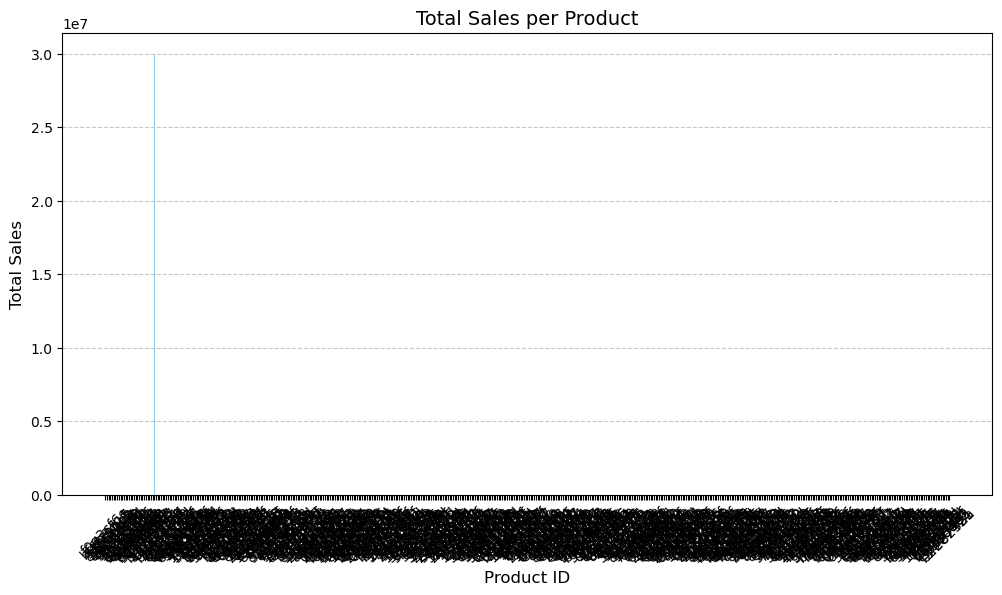

تم إغلاق الاتصال.


In [1]:
# Importing the necessary libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Database connection parameters
dbname = "project_DB"  # Database name
user = "postgres"      # Username
password = "123"       # Password
host = "localhost"     # Host
port = "5432"          # Port

# Create a connection to the database
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{dbname}')

# Verify the connection
try:
    connection = engine.connect()
    print("Connected successfully!")
except Exception as e:
    print("Error while connecting to the database:", e)

# Query to load data from the branches dimension table
branches_query = "SELECT * FROM dw.branches_dimension;"
branches_data = pd.read_sql(branches_query, engine)

# Display the first 5 rows of branches data
print("Branches Data:")
print(branches_data.head())

# Query to analyze product sales
sales_query = """
SELECT 
    product_id, 
    SUM(quantity) AS total_quantity, 
    SUM(price * quantity) AS total_sales
FROM 
    dw.invoices_fact
GROUP BY 
    product_id
"""
sales_data = pd.read_sql(sales_query, engine)

# Display the first 5 rows of sales data
print("\nSales Data:")
print(sales_data.head())

# Create a bar chart for product sales
plt.figure(figsize=(12, 6))
plt.bar(sales_data['product_id'], sales_data['total_sales'], color='skyblue')
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Total Sales per Product', fontsize=14)
plt.xticks(rotation=45)  # Rotate X-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Close the connection
connection.close()
print("Connection closed.")
